#### `Read data with a time index`
pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.

In this exercise, you will read data from a CSV file called __climate_change.csv__ that contains measurements of __CO2__ levels and temperatures made on the ___6th___ of every month from ___1958___ until __2016__. You will use __pandas' read_csv function.__

To designate the index as a __DateTimeIndex__, you will use the __parse_dates__ and __index_col__ key-word arguments both to parse this column as a variable that contains dates and also to designate it as the index for this DataFrame.

_By the way, if you haven't downloaded it already, check out the_ [Matplotlib Cheat Sheet.](https://datacamp-community-prod.s3.amazonaws.com/e1a8f39d-71ad-4d13-9a6b-618fe1b8c9e9) _It includes an overview of the most important concepts, functions and methods and might come in handy if you ever need a quick refresher!_


- Import the __pandas__ library as __pd__.
- Read in the data from a CSV file called '__climate_change.csv__' using __pd.read_csv__.
- Use the __parse_dates__ key-word argument to parse the "__date__" column as __dates__.
- Use the __index_col__ key-word argument to set the "__date__" column as the __index__.

In [1]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('../../datasets/climate_change.csv', parse_dates=['date'], index_col=['date'])

#### `Plot time-series data`
To plot time-series data, we use the __Axes__ object __plot__ command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

This exercise provides data stored in a DataFrame called __climate_change__. This variable has a time-index with the dates of measurements and two data columns: "__co2__" and "__relative_temp__".

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the "__relative_temp__" column as the y-axis values. We will also properly label the x-axis and y-axis.

- Add the data from __climate_change__ to the plot: use the DataFrame __index__ for the x value and the "__relative_temp__" column for the ___y___ values.
- Set the __x-axis__ label to '__Time__'.
- Set the __y-axis__ label to '__Relative temperature (Celsius)__'.
- Show the figure.

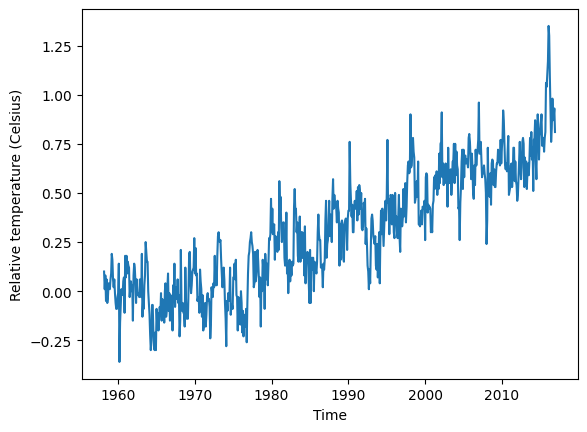

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

#### `Using a time index to zoom in`
When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a range of dates to zoom in on a particular period within the time-series using pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

The data to use is stored in a DataFrame called __climate_change__, which has a time-index with dates of measurements and two data columns: "__co2__" and "__relative_temp__".

- Use __plt.subplots__ to create a Figure with one Axes called __fig__ and __ax__, respectively.
- Create a variable called __seventies__ that includes all the data between "__1970-01-01__" and "__1979-12-31__".
- Add the data from __seventies__ to the plot: use the DataFrame __index__ for the x value and the "__co2__" column for the y values.

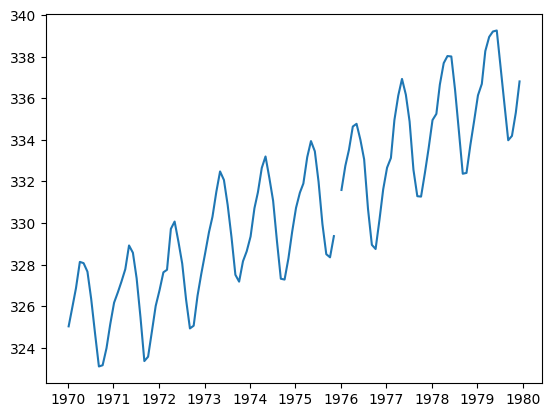

In [3]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

#### `Plotting two variables`
If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the ___twinx___ method.

In this exercise, you'll have access to a DataFrame that has the __climate_change__ data loaded into it. This DataFrame was loaded with the "__date__" column set as a __DateTimeIndex__, and it has a column called "__co2__" with carbon dioxide measurements and a column called "__relative_temp__" with temperature measurements.

- Use ___plt.subplots___ to create a Figure and Axes objects called __fig__ and __ax__, respectively.
- Plot the carbon dioxide variable in blue using the Axes __plot__ method.
- Use the Axes __twinx__ method to create a twin Axes that shares the x-axis.
- Plot the relative temperature variable in red on the twin Axes using its __plot__ method.

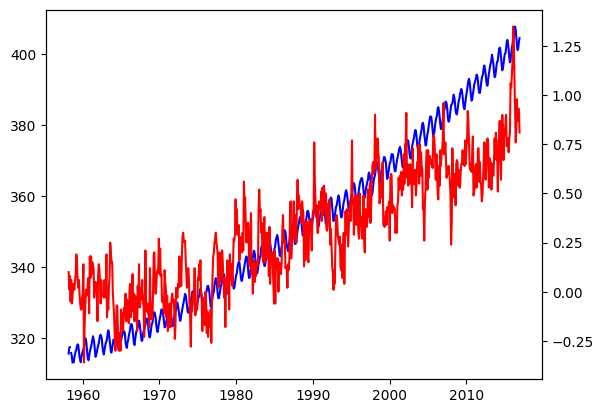

In [10]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

#### `Defining a function that plots time-series data`
Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

- Define a function called __plot_timeseries__ that takes as input an Axes object (__axes__), data (__x,y__), a string with the name of a color and strings for x- and y-axis labels.
- Plot y as a function of in the color provided as the input __color__.
- Set the x- and y-axis labels using the provided input __xlabel__ and __ylabel__, setting the _y-axis_ label color using __color__.
- Set the y-axis tick parameters using the __tick_params__ method of the Axes object, setting the __colors__ key-word to __color__.

In [12]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

#### `Using a plotting function`
Defining functions allows us to reuse the same code without having to repeat all of it. Programmers sometimes say ["Don't repeat yourself"](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself).

In the previous exercise, you defined a function called __plot_timeseries__:
- plot_timeseries(axes, x, y, color, xlabel, ylabel)


that takes an Axes object (as the argument __axes__), time-series data (as ___x___ and ___y___ arguments) the name of a color (as a string, provided as the __color__ argument) and x-axis and y-axis labels (as __xlabel__ and __ylabel__ arguments). In this exercise, the function __plot_timeseries__ is already defined and provided to you.

Use this function to plot the __climate_change__ time-series data, provided as a pandas DataFrame object that has a DateTimeIndex with the dates of the measurements and __co2__ and __relative_temp__ columns.

- In the provided __ax__ object, use the function __plot_timeseries__ to plot the "__co2__" column in blue, with the x-axis label "__Time (years)__" and y-axis label "__CO2 levels__".
- Use the __ax.twinx__ method to add an Axes object to the figure that shares the x-axis with __ax__.
- Use the function __plot_timeseries__ to add the data in the "__relative_temp__" column in red to the twin Axes object, with the x-axis label "__Time (years)__" and y-axis label "__Relative temperature (Celsius)__".

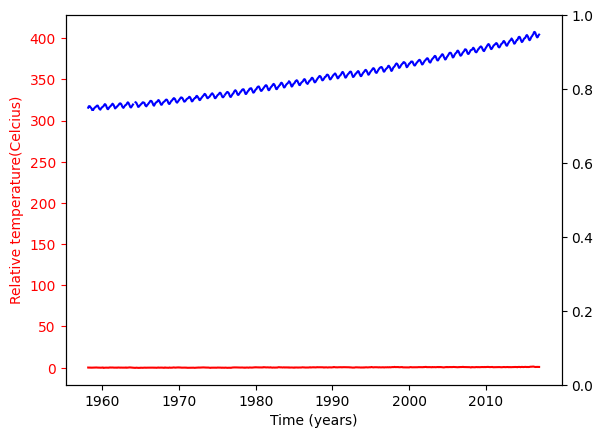

In [13]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature(Celcius)')

plt.show()

#### `Annotating a plot of time-series data`
Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

For this, we will use the __annotate__ method of the Axes object. In this exercise, you will have the __DataFrame__ called __climate_change__ loaded into memory. Using the Axes methods, plot only the relative temperature column as a function of dates, and annotate the data.

- Use the __ax.plot__ method to plot the DataFrame index against the __relative_temp__ column.
- Use the __annotate__ method to add the text '__>1 degree__' in the location __(pd.Timestamp('2015-10-06'), 1)__.

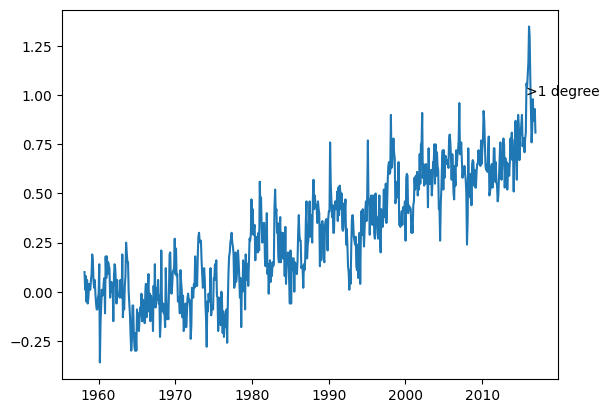

In [14]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

#### `Plotting time-series: putting it all together`
In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is provided as a DataFrame called __climate_change__. You should also use the function that we have defined before, called __plot_timeseries__, which takes an __Axes__ object (as the axes argument) plots a time-series (provided as ___x___ and __y__ arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

- __plot_timeseries(axes, x, y, color, xlabel, ylabel)__

Then, you will annotate with text an important time-point in the data: on 2015-10-06, when the temperature first rose to above 1 degree over the average.

- Use the __plot_timeseries__ function to plot __CO2__ levels against time. Set xlabel to "__Time (years)__" ylabel to "__CO2 levels__" and color to '__blue__'.
- Create __ax2__, as a twin of the first Axes.
- In __ax2__, plot temperature against time, setting the color ylabel to "__Relative temp (Celsius)__" and color to '__red__'.
- Annotate the data using the __ax2.annotate__ method. Place the text "__>1 degree__" in __x=pd.Timestamp('2008-10-06')__, ___y=-0.2___ pointing with a gray thin arrow to __x=pd.Timestamp('2015-10-06')__, ___y = 1___.

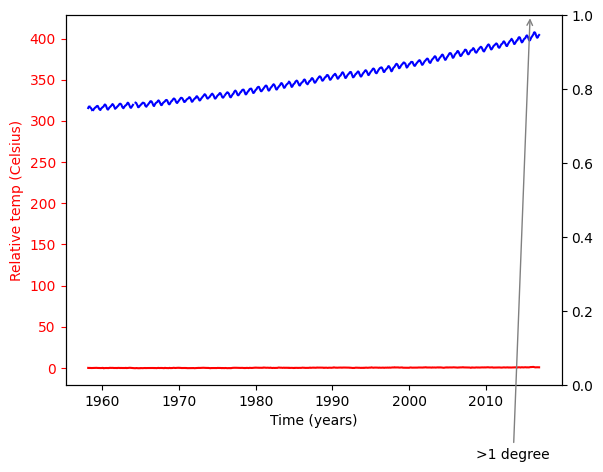

In [16]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color': 'gray'})

plt.show()

